# PyCPL

## What is in PyCPL?

4 submodules:

1. `core`: 
    * Classes for basic data types (e.g. `Image`, `Mask`, `Table`, `Vector`, `BiVector`, `Matrix`, `Property`).
    * Containers for data types (e.g. `ImageList`, `PropertyList`).
    * Lgging & console messages (`Msg`).
    * Error handling (custom Exception classes).
    * Statistics functions, polynomials
1. `dfs` (Data Flow System):
    * Functions used to ensure metadata is compliant with ESO DFS standards for pipeline products.
1. `drs` (Data Reduction System):
    * Object detection and aperture operations.
    * Detector chracterisation (read noise, bad pixel reconstruction).
    * Fast Fourier Transforms.
    * Image alignment and stacking.
    * Nonlinear fitting (Levenberg-Marquardt)
    * World Coordinate System (WCS).
1. `ui`:
    * Classes for recipes (`CRecipe`, `PyRecipe`).
    * FITS file management (`Frame`, `FrameSet`).
    * Parameters, and a parameter container (`ParameterValue`, `ParameterRange`, `ParameterEnum`, `ParameterList`)
    * More custom Exceptions.
    
## A more substantial example 

### A few imports for later

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.visualization import PercentileInterval, ImageNormalize, AsinhStretch

plt.rcParams['figure.figsize'] = 20, 12

In [2]:
from cpl.ui import Frame
from cpl.core import Image, ImageList

### Create a Pyesorex instance

Use the config file that includes the Python recipe directory

In [3]:
from pyesorex.pyesorex import Pyesorex

In [4]:
p = Pyesorex(config="demo2.rc")

[ INFO  ] Read config file '/home/ahorton/Documents/CPL/git/demos/demo2.rc'.
[ INFO  ] This is PyEsoRex, version 0.9.0.


### Input files

We have a SOF that includes 3 raw image files to be processed, a master dark frame, and a master flat field.

In [5]:
p.sof_location = "example.sof"

In [6]:
with open("example.sof") as sof:
    for line in sof:
        print(line)

/home/ahorton/Documents/CPL/git/demos/example/20180801T085727.fits OBJECT

/home/ahorton/Documents/CPL/git/demos/example/20180801T090307.fits OBJECT

/home/ahorton/Documents/CPL/git/demos/example/20180801T090848.fits OBJECT

/home/ahorton/Documents/CPL/git/demos/example/master_dark_300s.fits DARK

/home/ahorton/Documents/CPL/git/demos/example/master_flat.fits FLAT


### Look at a raw frame

PyCpl `Image` objects can be passed to functions that expect numpy arrays, e.g. matplotlib plotting functions.

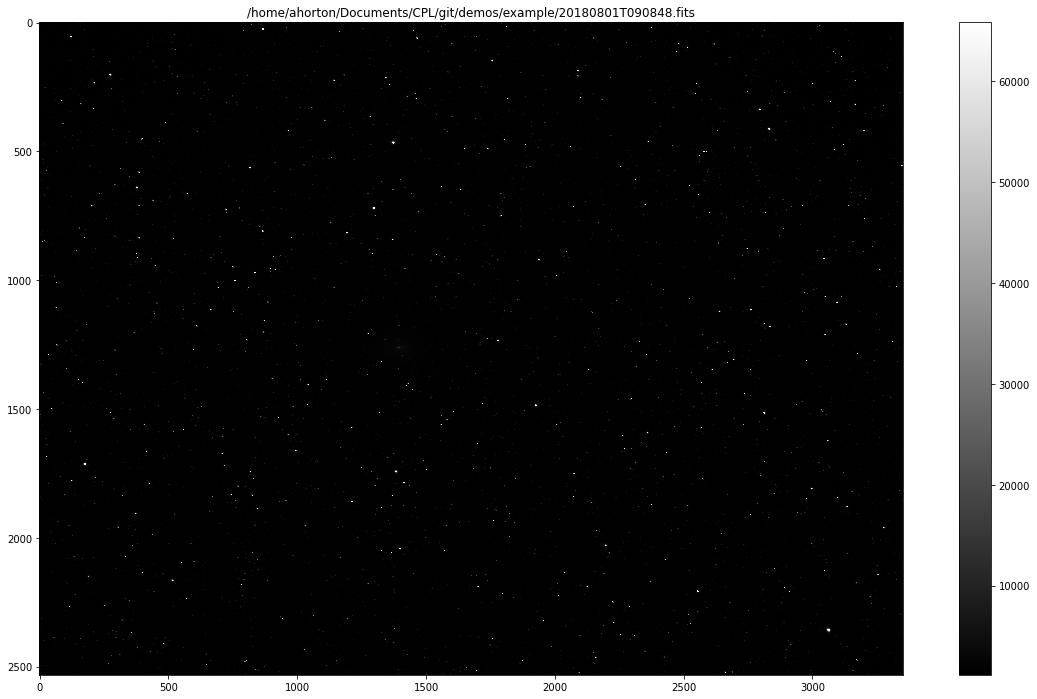

In [7]:
raw_frame_3 = Frame(file="/home/ahorton/Documents/CPL/git/demos/example/20180801T090848.fits")
raw_image_3 = Image.load(raw_frame_3.file)

norm = ImageNormalize(raw_image_3, interval=PercentileInterval(98), stretch=AsinhStretch())
plt.imshow(raw_image_3, interpolation='nearest', cmap='gray')
plt.title(raw_frame_3.file)
plt.colorbar();

### Load the example recipe

In [8]:
print(p.get_recipes_text())

List of available recipes:

  giframestack          : Creates a stacked image from a set of raw images.
  gimasterbias          : Creates a master bias image from a set of raw biases.
  gimasterdark          : Creates a master dark image from a set of raw dark frames.
  gimasterflat          : Create the fiber master flat field and the localization mask.
  giscience             : Process a science observation.
  gistandard            : Process a spectro-photometric standard star observation and compute the instrument response curve.
  giwavecalibration     : Compute dispersion solution from an arc-lamp spectrum.
  hellofits             : Says hello to each FITS file.
  hellouser             : Greets the user and lists the first N FITS files.
  example               : Example of some basic data reduction processes.



In [9]:
p.load_recipe("example")

[ INFO  ] Loaded recipe 'example'.


In [10]:
p.recipe.description

'Example of some basic data reduction processes. Expects a FrameSet containing a master dark frame, a master flat field frame, and some number of raw object frames to be processed. For each object frame it will subtract the master dark then divide by the flat field and save the resulting FITS file. It returns a FrameSet of the processed frames.'

### Run the recipe

The recipe returns a FrameSet containing the details of the processed images.

In [11]:
result = p.run()

[ INFO  ] Running recipe 'example'...
[ INFO  ] Loaded dark frame '/home/ahorton/Documents/CPL/git/demos/example/master_dark_300s.fits'.
[ INFO  ] Loaded flat frame '/home/ahorton/Documents/CPL/git/demos/example/master_flat.fits'.
[ INFO  ] Processing '/home/ahorton/Documents/CPL/git/demos/example/20180801T085727.fits'...
[ INFO  ] Saved processed file as './products/20180801T085727.fits'.
[ INFO  ] Processing '/home/ahorton/Documents/CPL/git/demos/example/20180801T090307.fits'...
[ INFO  ] Saved processed file as './products/20180801T090307.fits'.
[ INFO  ] Processing '/home/ahorton/Documents/CPL/git/demos/example/20180801T090848.fits'...
[ INFO  ] Saved processed file as './products/20180801T090848.fits'.
[ INFO  ] Recipe 'example' complete.


In [12]:
result

<cpl.ui.FrameSet, 3 Frames>

### Look at a processed frame

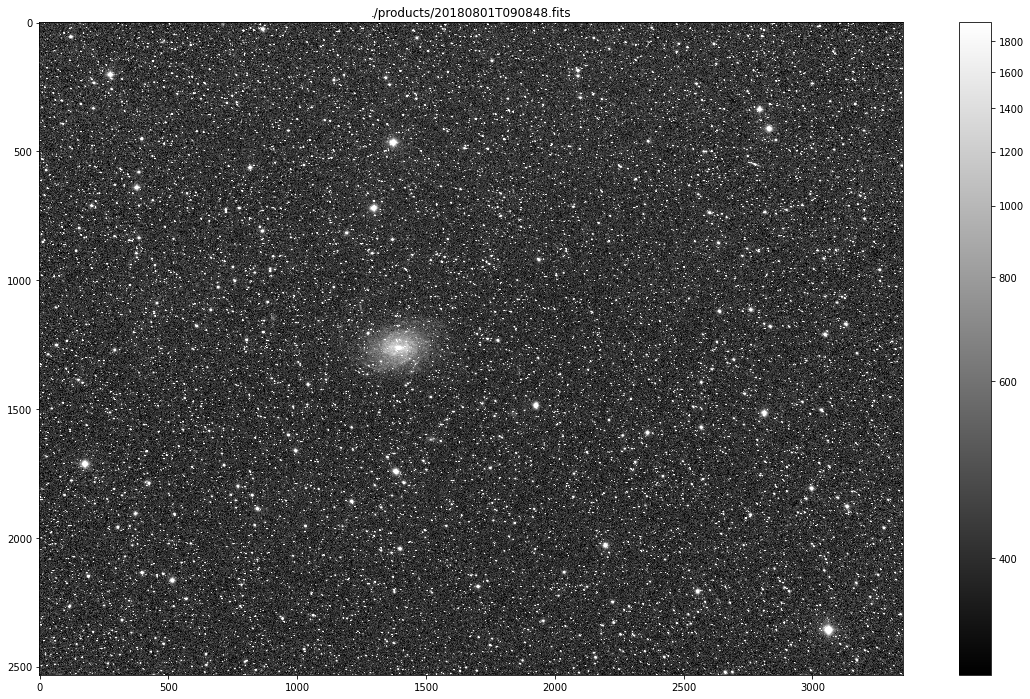

In [13]:
processed_3 = result[2].as_ccddata()
norm = ImageNormalize(processed_3, interval=PercentileInterval(98), stretch=AsinhStretch())
plt.imshow(processed_3, norm=norm, interpolation='nearest', cmap='gray')
plt.title(result[2].file)
plt.colorbar();